# Лабораторная №1. Основы предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [3]:
path='credit_3530203_70101.csv'
credit_df = pd.read_csv(path, index_col=0)


# 1 Вопрос

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         502 non-null    object 
 1   duration                502 non-null    float64
 2   credit_history          502 non-null    object 
 3   purpose                 502 non-null    object 
 4   credit_amount           502 non-null    float64
 5   savings_status          502 non-null    object 
 6   employment              502 non-null    object 
 7   installment_commitment  502 non-null    float64
 8   other_parties           502 non-null    object 
 9   property_magnitude      502 non-null    object 
 10  age                     502 non-null    float64
 11  other_payment_plans     502 non-null    object 
 12  housing                 502 non-null    object 
 13  existing_credits        502 non-null    float64
 14  job                     502 non-null    ob

<ol>
<li><strong>checking_status(Статус существующего текущего счета)</strong>  Порядковая </li> 
<li><strong>duration(Продолжительность в месяцах)</strong>  Абсолютная </li> 
<li><strong>credit_history</strong>  Номинальная </li> 
<li><strong>purpose</strong>  Номинальная  </li>               
<li><strong>credit_amount</strong>  Абсолютная  </li>          
<li><strong>savings_status(Сберегательный счет / облигации)</strong>  Порядковая </li>            
<li><strong>employment(Настоящая занятость с)</strong>  Порядковая </li>            
<li><strong>installment_commitment(Размер рассрочки в процентах от располагаемого дохода)</strong>  Абсолютная </li> 
<li><strong>other_parties(Прочие должники / поручители)</strong>  Номинальная </li>         
<li><strong>property_magnitude(Собственность)</strong>  Номинальная </li>      
<li><strong>age</strong>  Абсолютная  </li>                 
<li><strong>other_payment_plans(Другие планы рассрочки)</strong>  Номинальная </li>    
<li><strong>housing</strong>  Номинальная </li>              
<li><strong>existing_credits</strong>  Абсолютная </li>      
<li><strong>job</strong>  Номинальная </li>                   
<li><strong>num_dependents(Количество неработующих в семье)</strong>  Абсолютная  </li>         
<li><strong>foreign_worker</strong>  Номинальная </li>           
<li><strong>class</strong>  Номинальная </li>   
</ol>

# 2 Вопрос

#### Укажите признак с наименьшей дисперсией: num_dependents

In [5]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
count,502.000,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420,1.167
std,12.748,2822.553,1.106,11.274,0.586,0.374
min,-1.000,250.000,1.000,19.000,1.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


# 3 Вопрос

#### Среднее какого признака отличается для двух классов сильнее всего: credit_amount

In [6]:
abs(credit_df[credit_df["class"] == "bad"].mean() - credit_df[credit_df["class"] == "good"].mean())

duration                    4.982
credit_amount             573.110
installment_commitment      0.103
age                         3.304
existing_credits            0.099
num_dependents              0.022
dtype: float64

# 4 Вопрос
#### В каком классе больше всего skilled работников: в классе good

In [7]:
pd.crosstab(credit_df["class"], credit_df["job"])

job,high qualif/self emp/mgmt,skilled,unemp/unskilled non res,unskilled resident
class,,,,
bad,18,107,3,36
good,48,213,8,69


# 5 Вопрос

#### Есть ли в наборе признаки с выбросами? Какие? Да: credit_amount, duration, age, existing_credits, num_dependents

In [8]:
normal_df = MinMaxScaler().fit_transform(credit_df[["duration", "credit_amount", "installment_commitment", "age", "existing_credits", "num_dependents"]])

<AxesSubplot:>

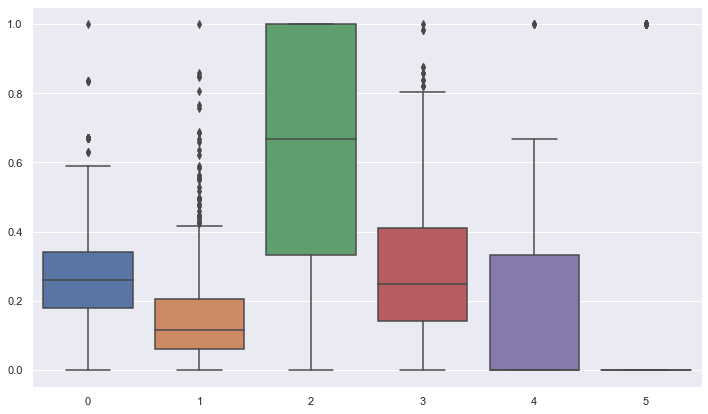

In [9]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=normal_df)

In [10]:
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good


# 6 Вопрос

#### Сколько пропущенных значений в наборе? 403

In [11]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
count,502.000,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420,1.167
std,12.748,2822.553,1.106,11.274,0.586,0.374
min,-1.000,250.000,1.000,19.000,1.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


In [12]:
for col in credit_df.columns:
    print(col, credit_df[col].unique()[:15])

checking_status ['0<=X<200' '>=200' '<0' 'no checking']
duration [18.  6. 24. 36.  9. 10. 15. 39. 12. -1. 48. 26.  4. 21. 30.]
credit_history ['existing paid' 'critical/other existing credit' 'all paid'
 'delayed previously' 'no credits/all paid']
purpose ['radio/tv' 'new car' 'used car' 'business' 'furniture/equipment'
 'repairs' 'education' 'retraining' 'domestic appliance' 'other']
credit_amount [1301. 1323. 3123. 5493. 1126. 1216. 1207. 1309. 2360. 6850. 1413. 8588.
  759. 4686. 2687.]
savings_status ['<100' '100<=X<500' 'no known savings' '500<=X<1000' '>=1000']
employment ['>=7' '<1' '1<=X<4' 'unemployed' '4<=X<7' '0']
installment_commitment [4. 2. 1. 3.]
other_parties ['guarantor' 'none' 'co applicant']
property_magnitude ['real estate' 'car' 'life insurance' 'no known property']
age [32. 28. 27. 42. 49. 38. 24. 36. 34. 45. 26. 20. 54. 37. 40.]
other_payment_plans ['none' 'bank' 'stores']
housing ['own' 'for free' 'rent']
existing_credits [1. 2. 4. 3.]
job ['unskilled resident' 

In [13]:
(credit_df['duration'] < 0).sum()

27

In [14]:
(credit_df['checking_status'] == 'no checking').sum()

197

In [17]:
(credit_df['savings_status'] == 'no known savings').sum()

95

In [18]:
(credit_df['property_magnitude'] == 'no known property').sum()

76

In [15]:
(credit_df["employment"] == "0").sum()

8

In [19]:
(credit_df['duration'] < 0).sum() \
+ (credit_df['checking_status'] == 'no checking').sum() \
+ (credit_df['savings_status'] == 'no known savings').sum() \
+ (credit_df['property_magnitude'] == 'no known property').sum() \
+ (credit_df["employment"] == "0").sum()

403

# 7 Вопрос
#### Попытайтесь заполнить пропущенные значения.

In [20]:
credit_df["duration"].value_counts()  
credit_df.loc[:, "duration"] = credit_df["duration"].replace(-1, credit_df["duration"].mean())
credit_df["duration"].value_counts()

24.000    101
12.000     71
18.000     53
36.000     37
15.000     36
6.000      30
20.426     27
48.000     24
9.000      24
30.000     23
21.000     19
10.000     10
60.000      7
27.000      5
42.000      5
20.000      4
4.000       4
11.000      3
45.000      3
8.000       3
39.000      3
28.000      2
13.000      2
40.000      1
22.000      1
16.000      1
14.000      1
72.000      1
26.000      1
Name: duration, dtype: int64

In [21]:
credit_df["employment"].value_counts() 
credit_df.loc[:, "employment"] = credit_df["employment"].replace("0", "unemployed")
credit_df["employment"].value_counts()

1<=X<4        162
>=7           125
<1             92
4<=X<7         88
unemployed     35
Name: employment, dtype: int64

##### Дальше по графику распределения категориальных и порядковых величин будет видно, что очень трудно восстановить исходную закономерность и заполнить пропуски.

# 8 Вопрос
#### Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.


In [22]:
ratio_features = ["duration", "credit_amount", "installment_commitment", "age", "existing_credits", "num_dependents"]
ordinal_features = ["checking_status","savings_status", "employment"]
categorial_features = list(set(credit_df.columns) - set(ratio_features) - set(ordinal_features))

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'credit_amount'}>],
       [<AxesSubplot:title={'center':'installment_commitment'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'existing_credits'}>,
        <AxesSubplot:title={'center':'num_dependents'}>]], dtype=object)

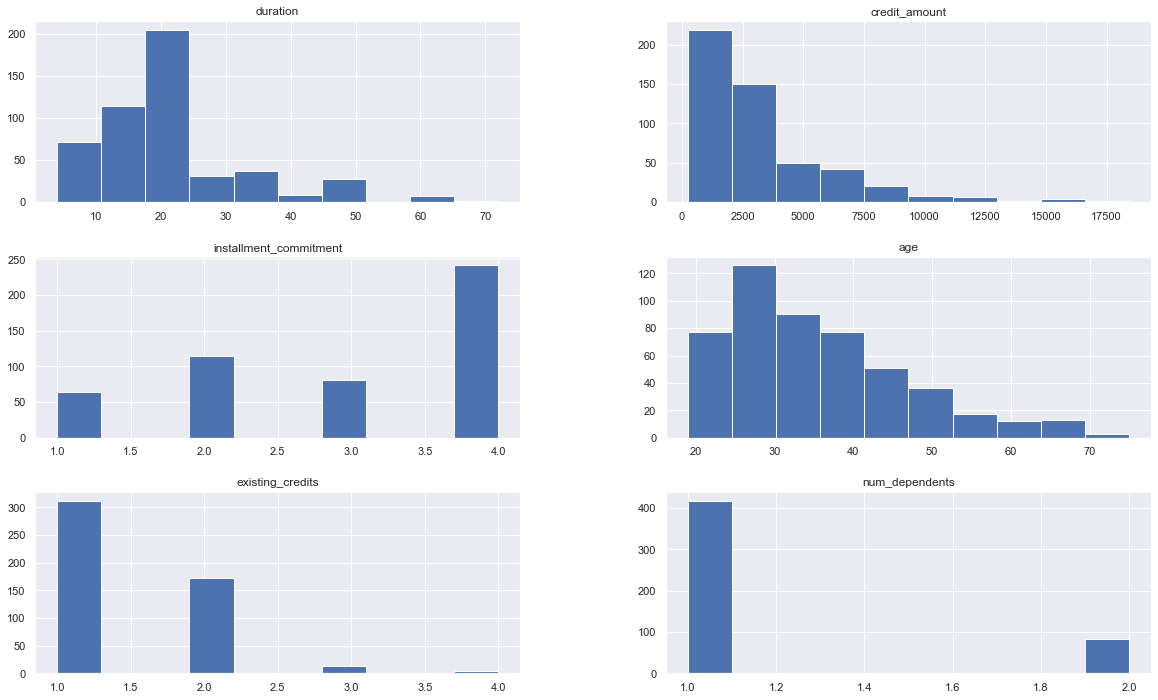

In [23]:
credit_df[ratio_features].hist(figsize=(20,12))
#Можно "примерно" оценить распределение признаков. Посмотреть самые частые группы в каждом признаке

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

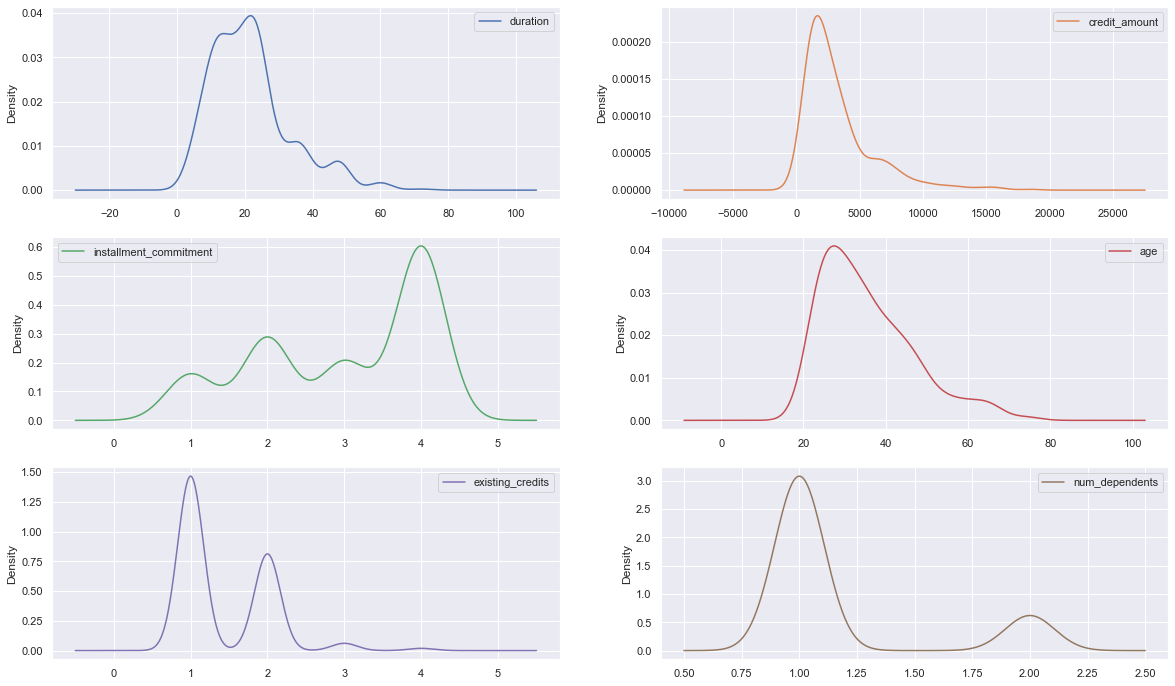

In [24]:
credit_df[ratio_features].plot(kind="density", layout=(3,2), subplots=True, figsize=(20,12), sharex=False)
#Позволяет лучше оценить распределение признаков

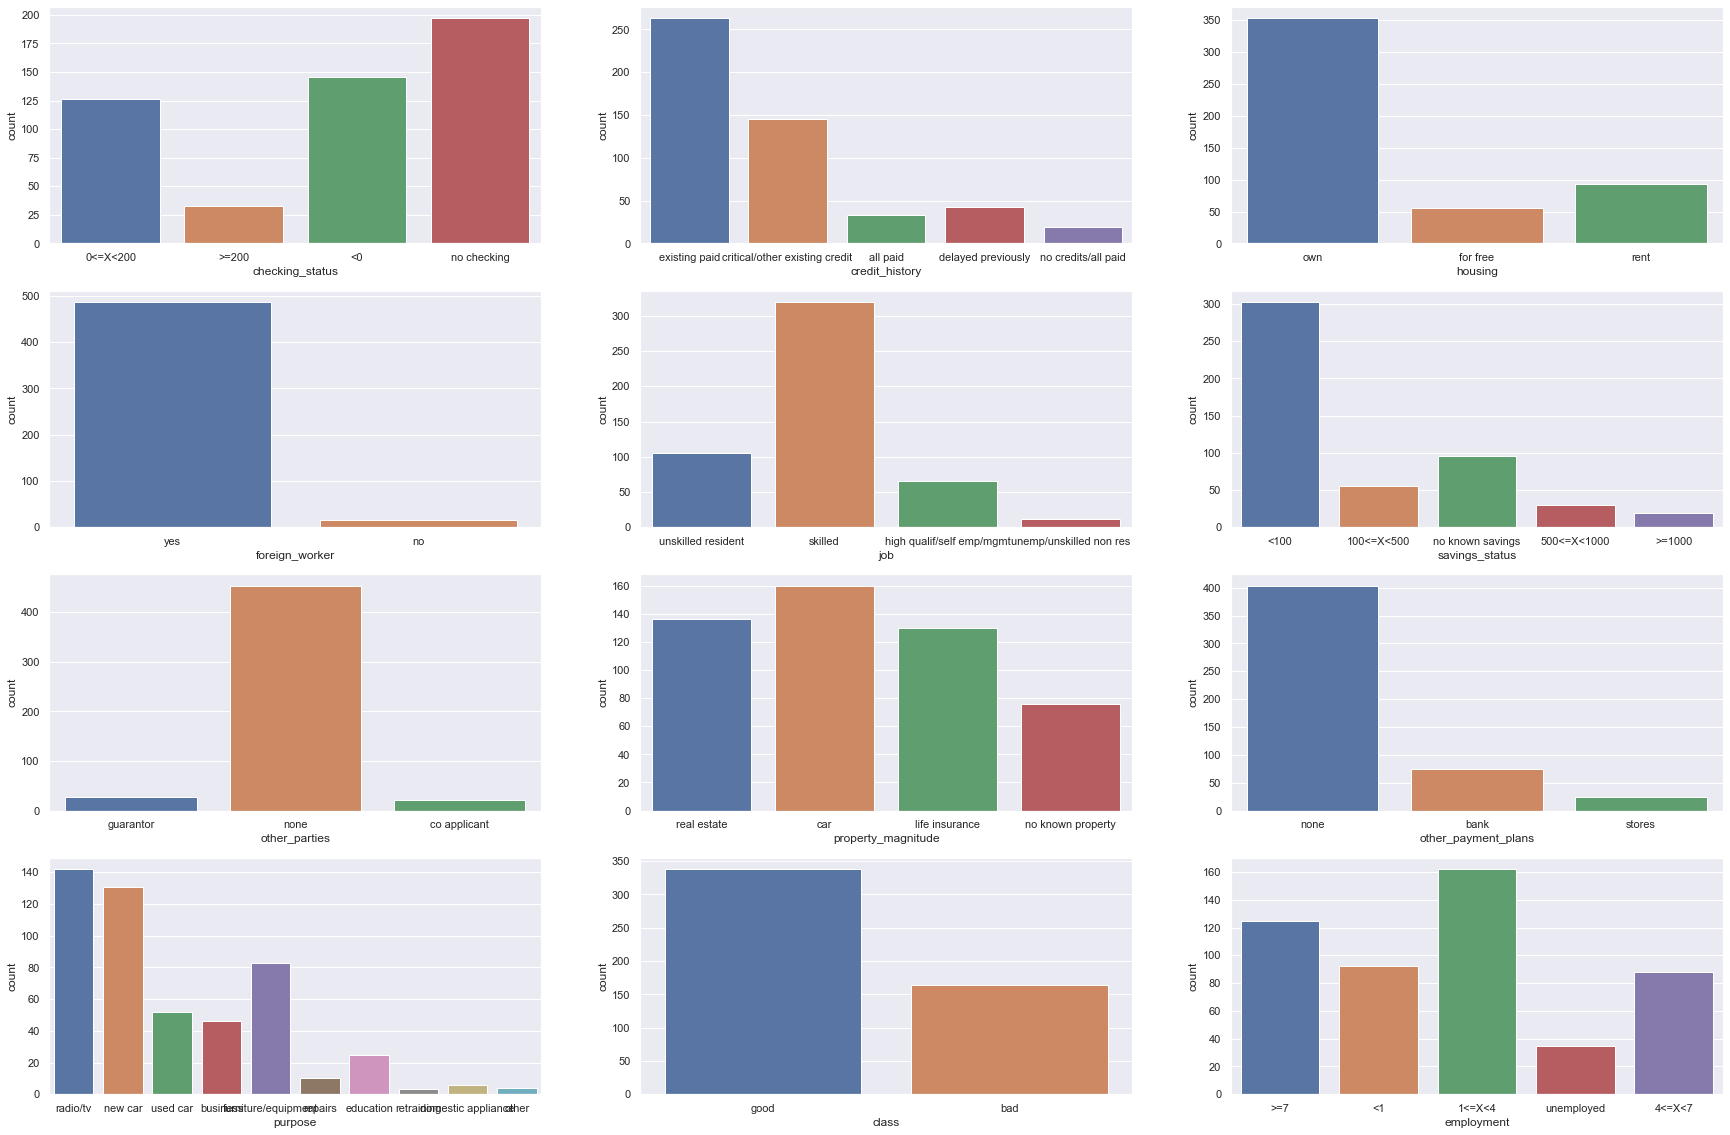

In [25]:
_, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 20))
ord_cat_features = list(set(credit_df.columns) - set(ratio_features))
for r in range(4):
    for c in range(3):
        sns.countplot(x=ord_cat_features[3 * r + c], data=credit_df, ax=axes[r][c])
#Распределение по количеству категориальных и порядковых признаков


# 9 Вопрос
#### Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

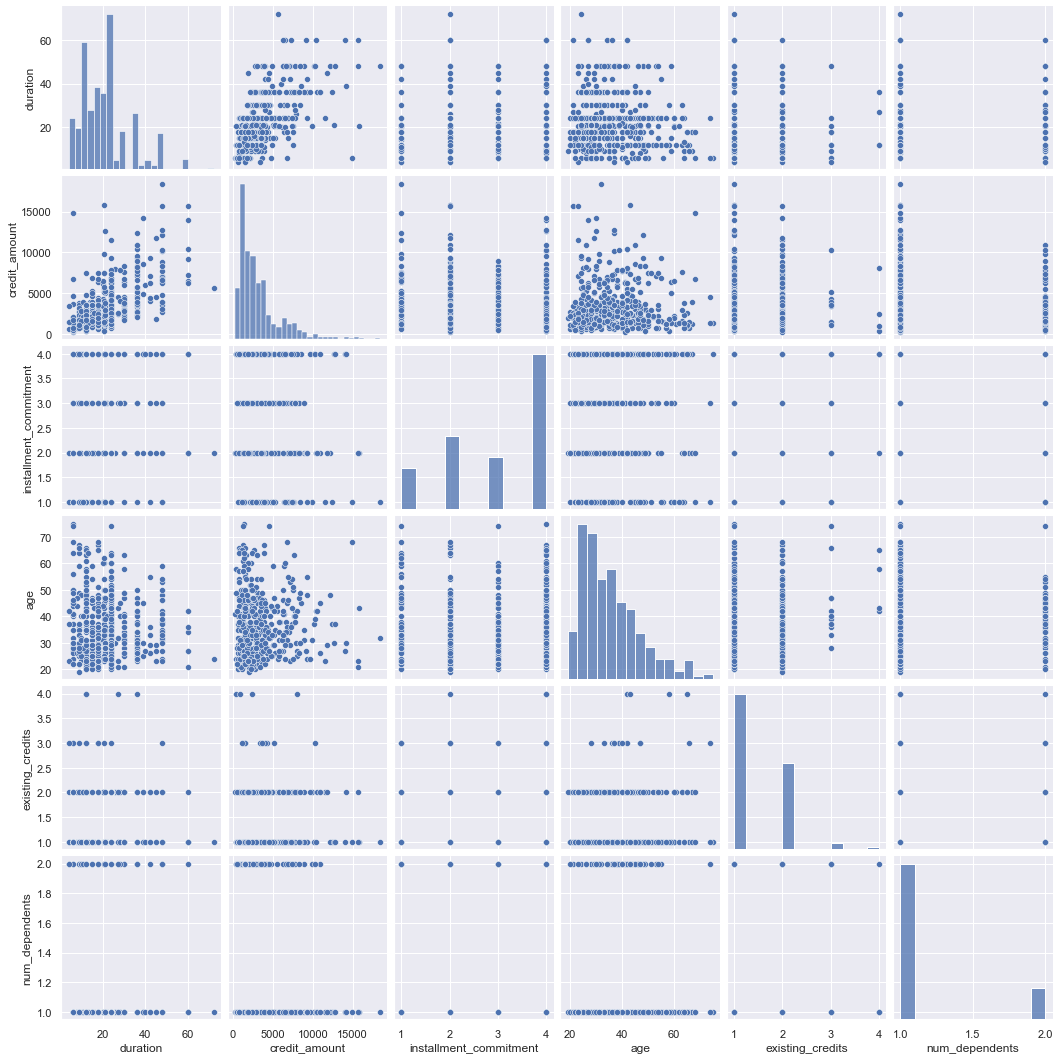

In [26]:
sns.pairplot(credit_df[ratio_features])
#Можно заметить прямую линейную зависимость между credit_amount и duration

<div class="alert alert-block alert-danger">
<b>Задание:</b> Построить для категориальных и порядковых признаков график, как сверху с добавлением класса
</div>

<AxesSubplot:>

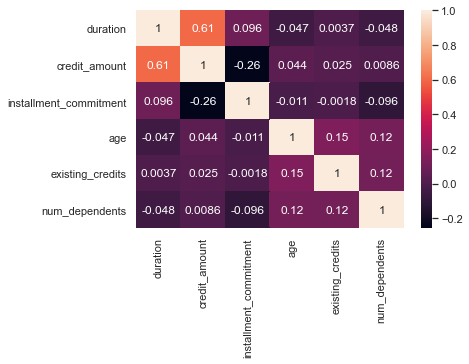

In [27]:
corr_matrix = credit_df[ratio_features].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})
#Теперь точно видим, что есть "умеренная" прямая линейная зависимость между credit_amount и duration.
#Также есть "слабая" обратная линейная зависимость между installment_commitment и credit_amount